# Comparing coincident changes across notebooks

In [71]:
from deathbeds.__Notebook_git_histories_as_dataframes import get_history
from toolz.curried import *; from toolz.curried.operator import *
import pandas
from poser import *

In [61]:
df = pandas.concat([
    get_history('..', 'deathbeds/2018-06-19-String-Node-Transformer.ipynb'),
    get_history('..', 'deathbeds/2018-08-04-Emojis-in-code-cells.ipynb'),
    get_history('..', 'deathbeds/2018-08-16-HTML-Flexbox.ipynb'),
    get_history('..', 'deathbeds/2018-08-13-Flexbox-Transformer.ipynb')])

In [87]:
changes = df.stats.drop_duplicates().apply(
    λ.attrgetter('files')*pandas.Series
).stack().apply(pandas.Series).reset_index('id', drop=True).reset_index().drop_duplicates().rename(columns={
    'level_1': 'path'
}).set_index(
    'committed_datetime path'.split()
).unstack(-1).swaplevel(1, 0, axis=1).sort_index()

In [90]:
%matplotlib inline

In [92]:
from matplotlib.pyplot import *

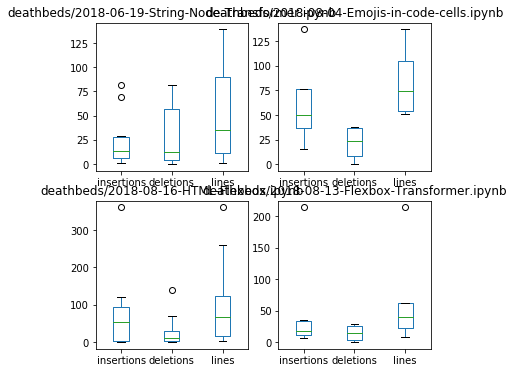

In [100]:
for i, path in enumerate(df.path.drop_duplicates()): changes[path].plot.box(
    title=path, ax=subplot(2,2,i+1), figsize=(6,6))